# **Dynamic Analysis of the Duffing Oscillator**

We are investigating the behavior of the Duffing oscillator, a nonlinear system characterized by a restoring force that is both linear and nonlinear in nature. The analysis is conducted through numerical simulations, whihc highlight the influence of nonlinearity, damping, and external forcing on the system's overall dynamics. By employing the numerical integration method, we can solve the Duffing equation and analyze the resulting phase space trajectories and time evolution of displacement and velocity. This  aims to deepen the understanding of nonlinear oscillatory systems and provide insights into the qualitative behavior of the Duffing oscillator under various conditions.

Nonlinear oscillators are pivotal in various physical systems,such as electrical circuits. Among them, the Duffing oscillator stands out due to its rich dynamical behavior, influenced by both linear and nonlinear terms in its restoring force. We are employing numerical methods to simulate the Duffing oscillator, providing a platform for exploring its dynamics under different parameters. The analysis focuses on how the interplay of damping, nonlinearity, and external forcing impacts the oscillatory behavior, with specific focus on phase space trajectories and the time evolution of variables.

The undamped Duffing oscillator can be described by the equation:

$\ddot x + \alpha x + \beta x^3= F \cos(\omega_f)t$

where $\alpha , \beta$ are stiffness parameters, $F$ is the force amplitude and $\omega_f$ is the frequency.

However we want to consider the full model, including damping. We then have the equation:

$ dv/dt = -\delta v - \alpha  x - \beta x^3 + \gamma \cos(\omega t)$
 
where x is the position of the oscillator, $\delta$ is a damping term, $\alpha$ is the stiffness of the spring, $\gamma$  is the amplitude of the driving force, and  $\omega $ is the frequency of the driving force. 

# Assumptions:

-The damping term is proportional to velocity.

-The Nonlinear stiffness is cubic

-The external forcing is either neglected or sinusoidal

-The system is isolated or the only energy dissipation that occurs is through damping


# Limitations:

-Model sssumes no higher-order nonlinearities beyond cubic stiffness

-Assumes damping is linear which is not true in all scenarios

-The forcing functions are either simplified or ignored

-The small-angle approximation for pendulums is typically not an accurate representation of real systems

As previous stated, the Duffing oscillator equation with forcing is given by:
$
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos(\omega t)
$


We can analyze the system's natural behavior by solving the equation without the forcing term e.g. $\gamma = 0$, which gives us:
$
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = 0
$


We can linearize this equation by assuming a small $x$ where $ x^3 \approx 0 $


For small oscillations, in which $\beta \to 0$, the system behaves like a damped harmonic oscillator where:
$
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x = 0
$

This system would display typical harmonic oscillator behaviors, dependent on if the system is overdamped ($\delta^2 < 4 \alpha$), underdamped ($\delta^2 > 4 \alpha$), or critically damped ($\delta^2 = 4 \alpha$).


In the limit where $\beta$ is large, the equation becomes dominated by the cubic term which can lead to strongly nonlinear behavior. When the forcing term takes over the dynamic, the system will be driven by the external force and resonance can occur when the driving frequency matches the natural frequency.

With high focing and low non-linearity, the system will likely exhibit resonance near its natural frequency, with large amplitude oscillations and phase shifts.

With high forcing and non-linearity, the non linearity effects will be the majority of the system which increases the complexity of the behavior and will likely cause chaotic oscillations. 

With small amounts or no damping, the system will conserve energy, and the trajectory will stay in its periodic orbits in phase space with minimal decay in amplitude.

# Numerical Analysis

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets 
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

**Inital Parameters:**

In [2]:
delta = 0.1  #damping coefficient
alpha = -1.0  #linear stiffness
beta = 1.0  #nonlinear stiffness
gamma = 0.3  #forcing amplitude
omega = 1.2  #forcing frequency

In [3]:
def duffing_oscillator(t, y, delta, alpha, beta, gamma, omega):
    x, v = y  #y is a vector containing [x, v] where v = dx/dt
    dxdt = v
    dvdt = -delta * v - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

In [4]:
def plot_fixed_plots_with_forcing(delta, alpha, beta, gamma, omega):
    t_span = (0, 100)  #time span
    t_eval = np.linspace(*t_span, 1000)  #time points
    y0 = [1.0, 0.0]  #initial conditions, displacement & velocity

    #solving the ode
    sol = solve_ivp(duffing_oscillator, t_span, y0, t_eval=t_eval, args=(delta, alpha, beta, gamma, omega))
    x = sol.y[0]  #displacement
    v = sol.y[1]  #velocity
    
    #plot displacement, v vs t
    plt.figure(figsize=(10, 6))
    plt.plot(sol.t, x, color='r', linestyle=':', label='Displacement (x)')
    plt.plot(sol.t, v, color='blue', linestyle='--', label='Velocity (v)')
    
    #labels and title
    plt.xlabel('Time (t)')
    plt.ylabel('Displacement (x) and Velocity (v)')
    plt.title('Displacement and Velocity vs Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

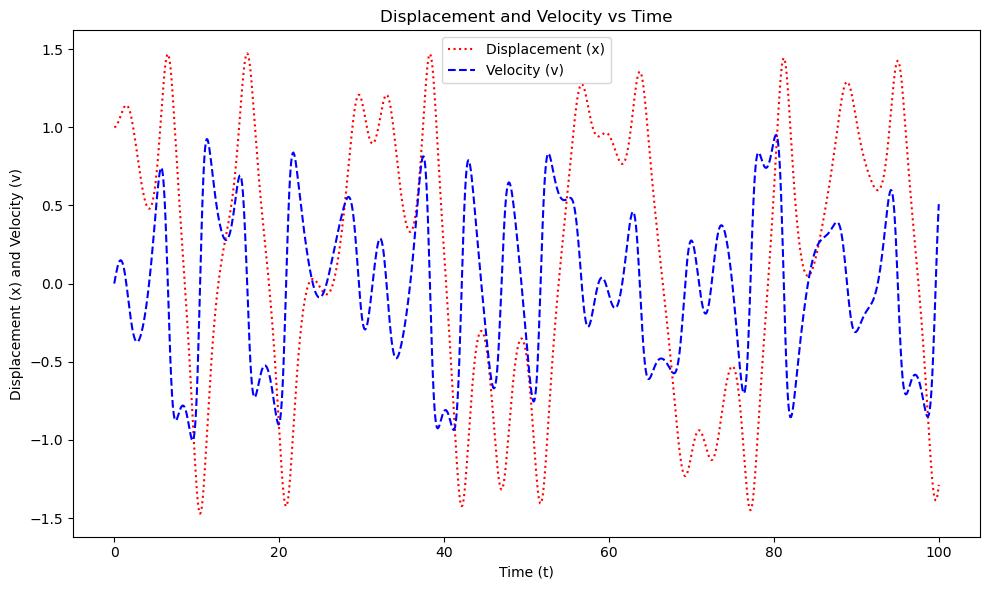

In [5]:
#run function
plot_fixed_plots_with_forcing(delta, alpha, beta, gamma, omega)

In [6]:
def plot_phase_space(delta, alpha, beta, gamma, omega):
    t_span = (0, 100)  #time span
    t_eval = np.linspace(*t_span, 1000)  #time points
    y0 = [1.0, 0.0]  #initial conditions

    #solving the ode
    sol = solve_ivp(duffing_oscillator, t_span, y0, t_eval=t_eval, args=(delta, alpha, beta, gamma, omega))
    x = sol.y[0]  #displacement
    v = sol.y[1]  #velocity

    #plot phase space
    plt.figure(figsize=(10, 6))
    plt.plot(x, v, color='blue')
    plt.xlabel('Displacement (x)')
    plt.ylabel('Velocity (v)')
    plt.title('Phase Space Diagram')
    plt.show()

We can  explore how changing the damping coefficient $\delta $, stiffness coefficients $(\alpha, \beta)$, and driving force $(\gamma, \omega)$ affect the behavior of the Duffing oscillator.

In [7]:
#widget requires juypter notebook

interact(plot_phase_space, 
    delta = widgets.FloatSlider(value=0.2, min=0, max=1.0, step=0.01, description='$\delta$'),
    alpha = widgets.FloatSlider(value=-1.0, min=-5.0, max=5.0, step=0.1, description='$\\alpha$'),
    beta = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='$\\beta$'),
    gamma = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.1, description='$\gamma$'),
    omega = widgets.FloatSlider(value=1.2, min=0.0, max=2.0, step=0.1, description='$\omega$'));

interactive(children=(FloatSlider(value=0.2, description='$\\delta$', max=1.0, step=0.01), FloatSlider(value=-…

## 3D Space

In [8]:
#3D oscillator with external forcing and damping
def duffing_oscillator_3d(t, y, delta, alpha, beta, gamma, omega):
    x, y_pos, z, vx, vy, vz = y  #y is a vector consisting of [x, y, z, vx, vy, vz]
    
    #equations of motion
    dxdt = vx
    dydt = vy
    dzdt = vz

    #equation for velocities in 3D
    dvxdt = -delta * vx - alpha * x - beta * x**3 + gamma * np.cos(omega * t)  #forcing in x
    dvydt = -delta * vy - alpha * y_pos - beta * y_pos**3 + gamma * np.sin(omega * t)  #forcing in y
    dvzdt = -delta * vz - alpha * z - beta * z**3  #no forcing in z direction

    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

In [9]:
#total energy function of the system
def total_energy(x, y, z, vx, vy, vz, alpha, beta):
    """
    returns the total energy including both kinetic and potential energy
    """
    kinetic_energy = 0.5 * (vx**2 + vy**2 + vz**2)
    potential_energy = 0.5 * alpha * (x**2 + y**2 + z**2) + (beta / 4) * (x**4 + y**4 + z**4)

    #total energy is the sum of kinetic and potential energy
    return kinetic_energy + potential_energy

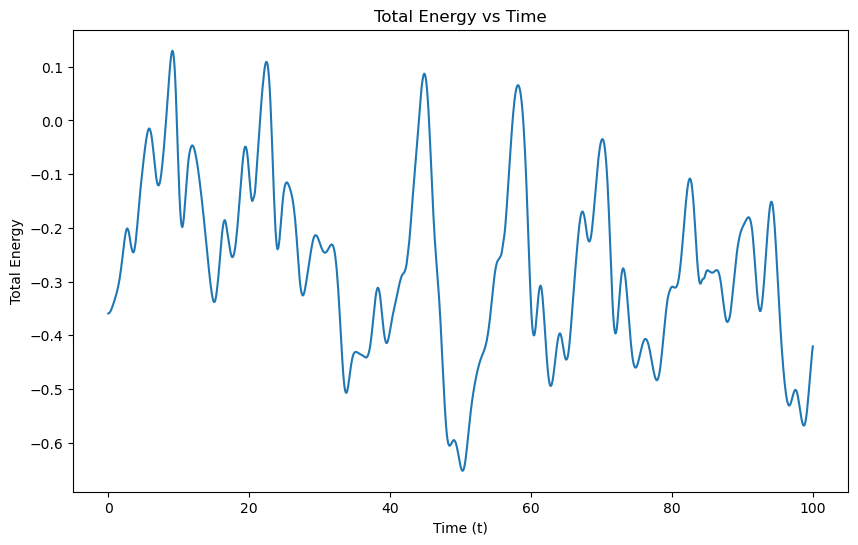

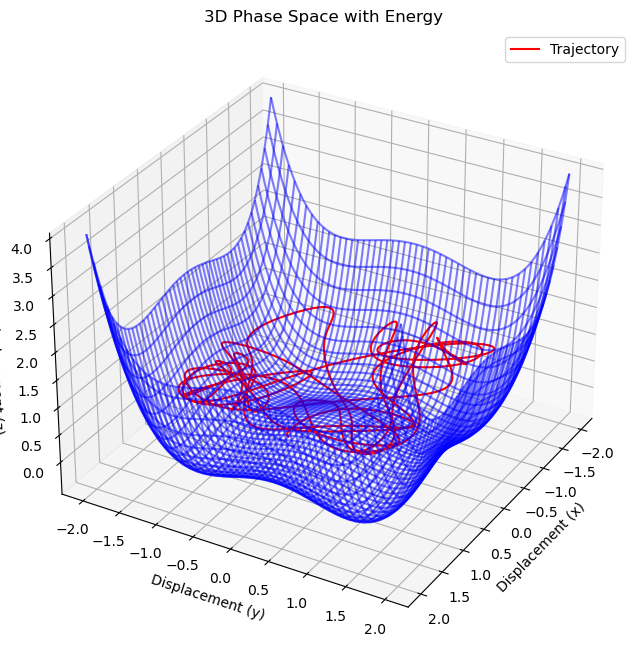

In [10]:
#function to create 3D phase space plot
def oscillator_with_forcing(delta, alpha, beta, gamma, omega):
    #displacement and velocity values for the energy surface
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    #calculating energy surface for z=0
    Z_energy = total_energy(X, Y, 0, 0, 0, 0, alpha, beta)

    #solving ode for trajectory in 3D
    t_span = (0, 100)
    y0 = [1.0, 0.0, 0.5, 0.0, 0.0, 0.0]  #initial conditions [x, y, z, vx, vy, vz]
    t_eval = np.linspace(*t_span, 1000)
    sol = solve_ivp(duffing_oscillator_3d, t_span, y0, t_eval=t_eval, args=(delta, alpha, beta, gamma, omega))
    
    #extracting positions and velocities
    x_traj = sol.y[0]
    y_traj = sol.y[1]
    z_traj = sol.y[2]
    vx_traj = sol.y[3]
    vy_traj = sol.y[4]
    vz_traj = sol.y[5]

    #calculate total energy along the trajectory
    energy_traj = total_energy(x_traj, y_traj, z_traj, vx_traj, vy_traj, vz_traj, alpha, beta)
    
    #plotting total energy vs. time
    plt.figure(figsize=(10, 6))
    plt.plot(sol.t, energy_traj, label='Total Energy')
    plt.xlabel('Time (t)')
    plt.ylabel('Total Energy')
    plt.title('Total Energy vs Time')
    plt.show()
    
    #3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    #wireframe plot of the energy surface in the x-y plane at z=0
    ax.plot_wireframe(X, Y, Z_energy, color='blue', alpha=0.5)

    #trajectory plot
    ax.plot(x_traj, y_traj, z_traj, color='red', label='Trajectory')

    ax.set_xlabel('Displacement (x)')
    ax.set_ylabel('Displacement (y)')
    ax.set_zlabel('Displacement (z)')
    ax.set_title('3D Phase Space with Energy')

    #adjusting view angle
    ax.view_init(elev=30, azim=30)
    plt.legend()
    plt.show()

#run function to plot 3D phase space and total energy
oscillator_with_forcing(delta, alpha, beta, gamma, omega)

### References
Fratus, Kevin. (2015). Nonlinear Oscillation. https://web.physics.ucsb.edu/~fratus/phys103/LN/NLO.pdf 

Kanamaru, TTakashi. (n.d.). Duffing oscillator. Scholarpedia. http://www.scholarpedia.org/article/Duffing_oscillator 

Rand, Richard. (n.d.). Lecture Notes on Nonlinear Vibrations. https://ecommons.cornell.edu/server/api/core/bitstreams/e7dc4104-720f-4cb8-9227-c2e7d9723fee/content 

Strogatz, Steven. (2015). Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. 